# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [44]:
# Import and Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [45]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###  Step1:- Reading and Understanding the Data


In [46]:
# importing dataset
bike = pd.read_csv("day (1).csv")

In [47]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [48]:
# Checking the descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [49]:
# using describe to have an insight
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [50]:
# Checking the shape of dataset

print(bike.shape)

(730, 16)


## Inference : 
- Dataset has 730 rows and 16 columns.
- Except one column dteday, all other are either float or integer type,one column is date type.
- some fields that are categorical in nature, but in float or integer type.

## DATA QUALITY CHECK
### Check for NULL/MISSING values

In [51]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [52]:
# row-wise null count percentage
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

## Insights
There are no missing / Null values either in columns or rows

## Step2:- Data Cleaning

Checking value_counts() for entire dataframe. 

This will help to identify any Unknow/Junk values present in the dataset.

In [53]:
#Create a copy of the  dataframe, without the 'instant' column,as this will have unique values
bike_dummy=bike.iloc[:,1:16]

In [54]:
# creating a for loop to count values
for colm in bike_dummy:
    print(bike_dummy[colm].value_counts(ascending=False), '\n\n\n')

dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 



season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 



yr
0    365
1    365
Name: count, dtype: int64 



mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64 



holiday
0    709
1     21
Name: count, dtype: int64 



weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64 



workingday
1    504
0    226
Name: count, dtype: int64 



weathersit
1    463
2    246
3     21
Name: count, dtype: int64 



temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: count, Length: 498, dtype: int64 



atemp
32.7

### Inference
There seems to be no Junk/Unknown values in the entire dataset.

### Drop columns that are not useful for analysis  :-
- `instant` is just a row instance identifier.
- `dteday` is removed as we have some of date features like month and year and weekday already in other columns and also for this analysis we will not considerin demand for bikes.
- `casual` and `registered` Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

In [55]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [56]:
# Droping instant column as it is index column which has nothing to do with target
bike.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bike.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bike.drop(['casual'], axis = 1, inplace = True)
bike.drop(['registered'], axis = 1, inplace = True)

### Step 3:- EDA

#### Convert season and weathersit to categorical types

In [57]:
bike.season.replace({1:"spring", 2:"summer", 3:"autumn", 4:"winter"},inplace = True)

bike.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike.mnth = bike.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike.weekday = bike.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


### Visualising data set

#### Visualising the Data to Find the Correlation between the Numerical Variable

<Figure size 1500x3000 with 0 Axes>

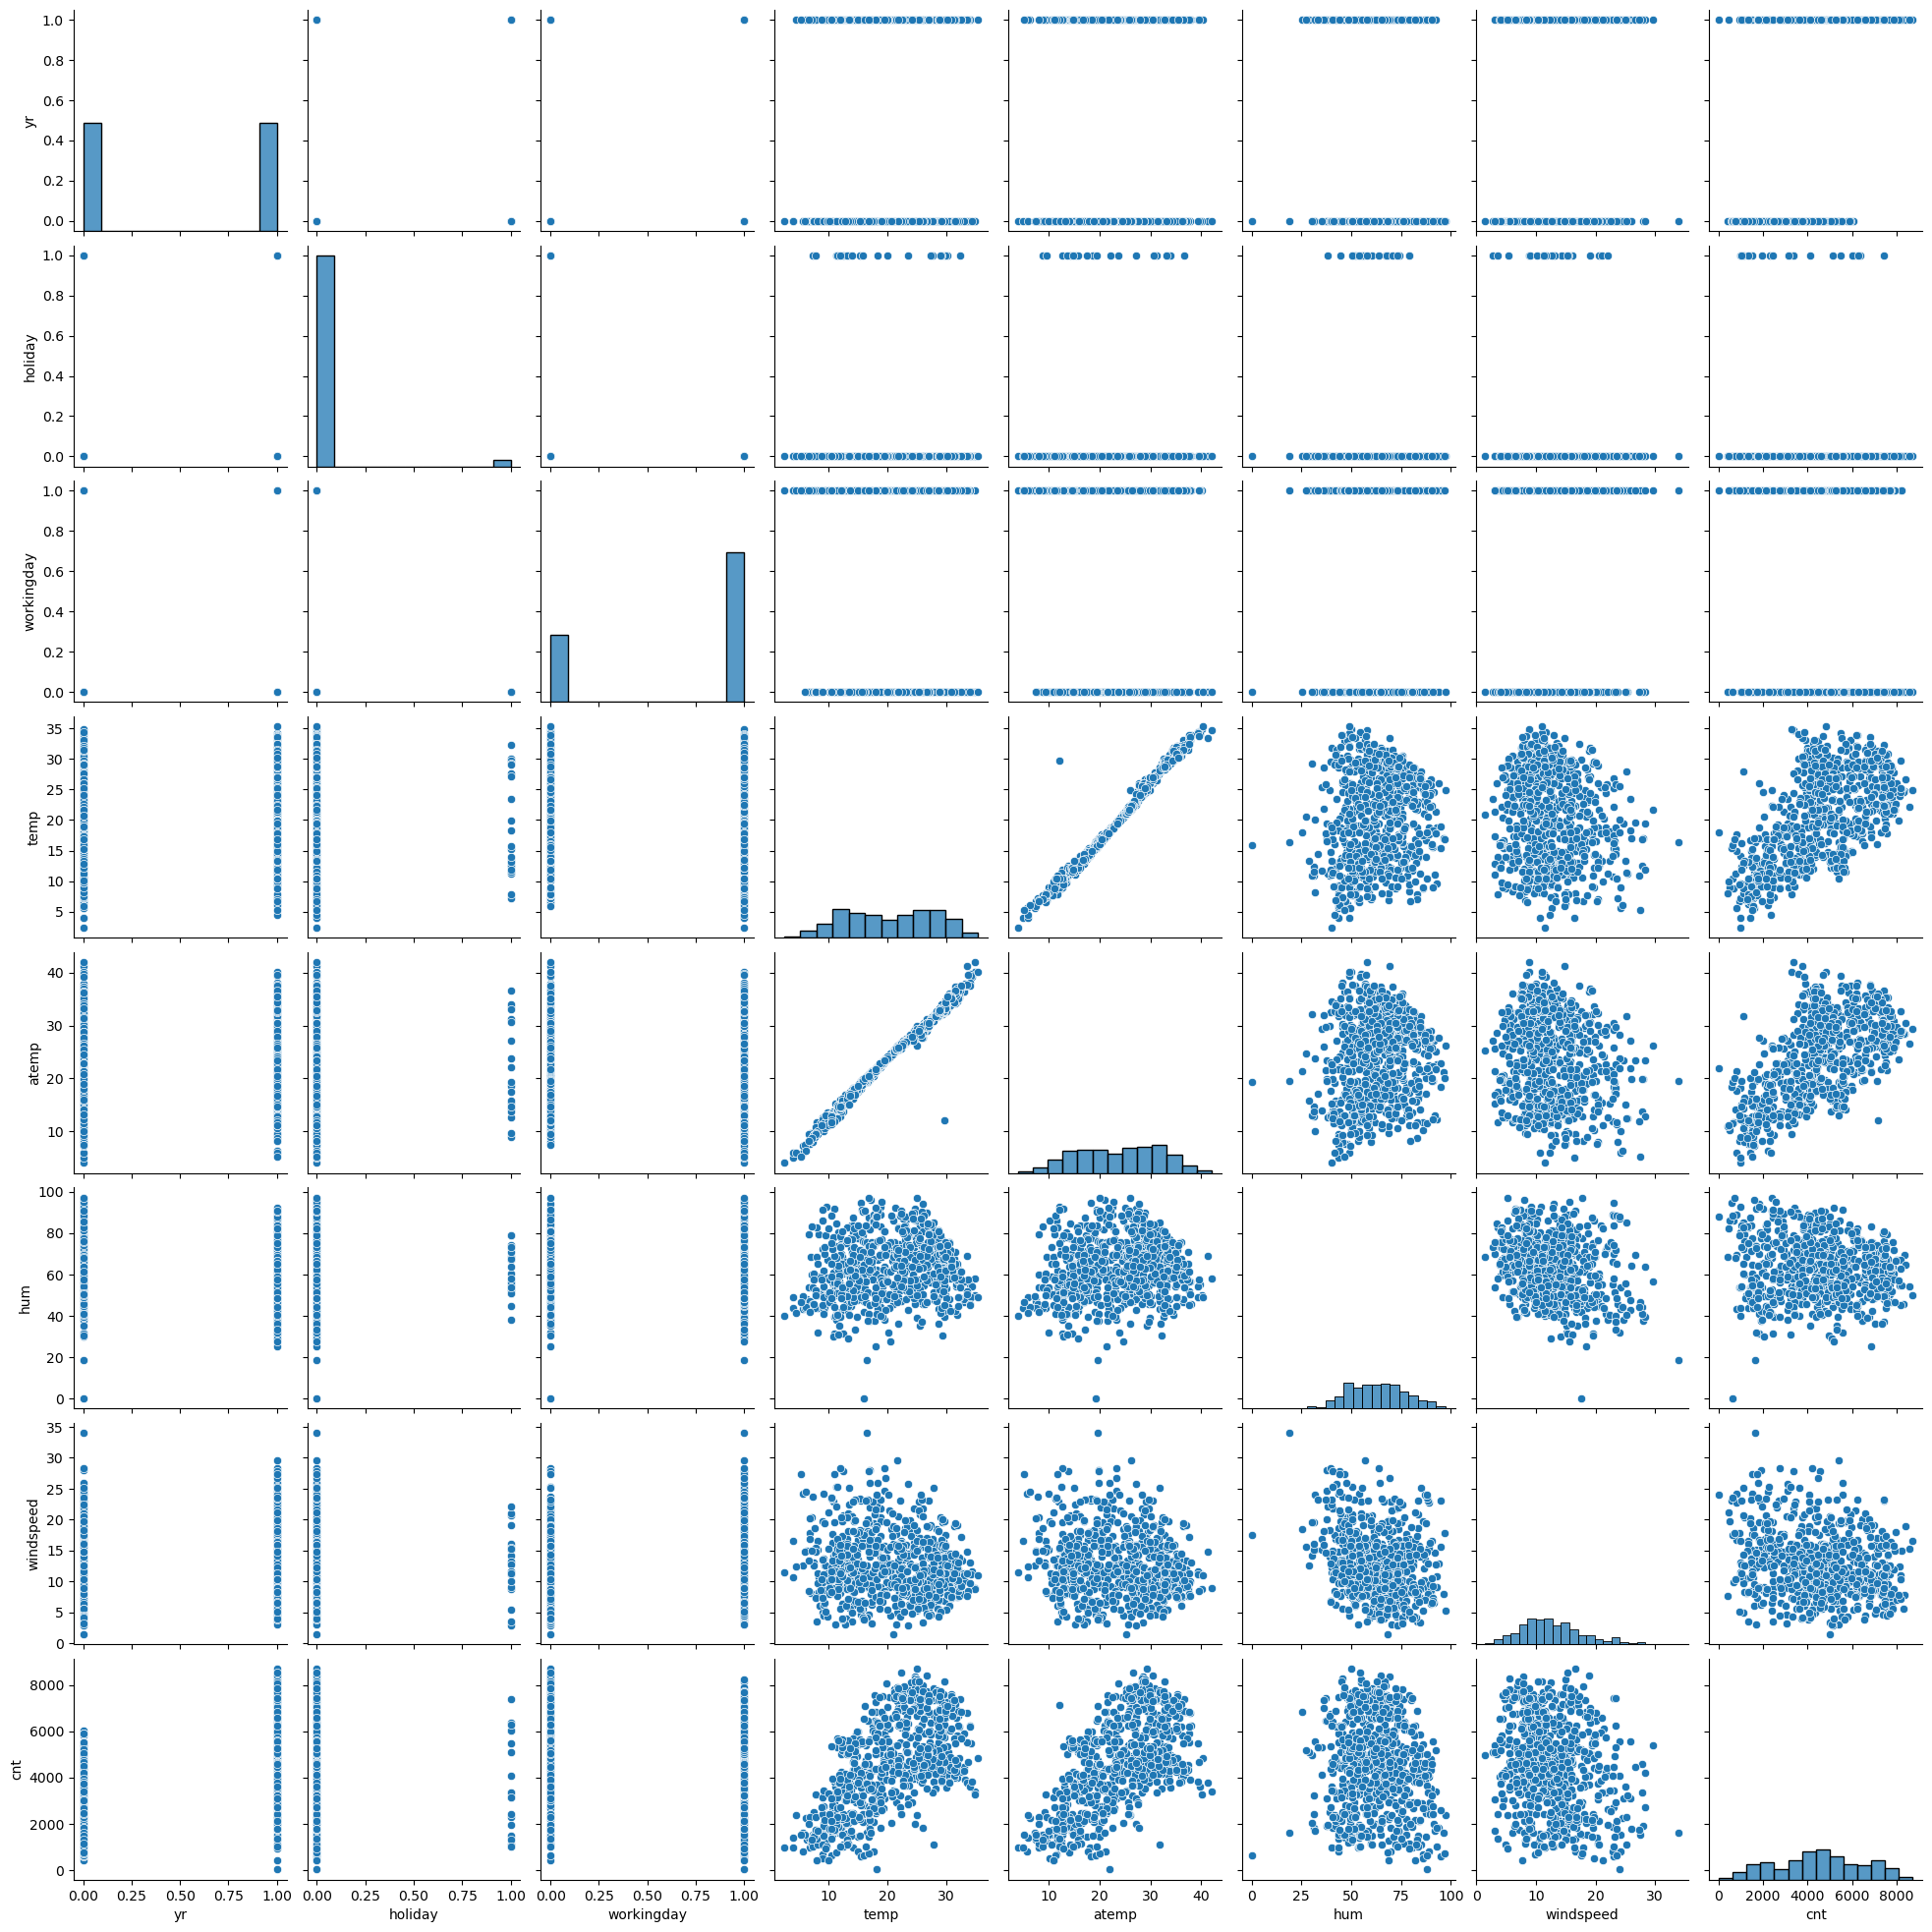

In [14]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(bike)
plt.show()

#### Inference:
- Looks like the temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other

#### Analysing Categorical Variabels with target variables

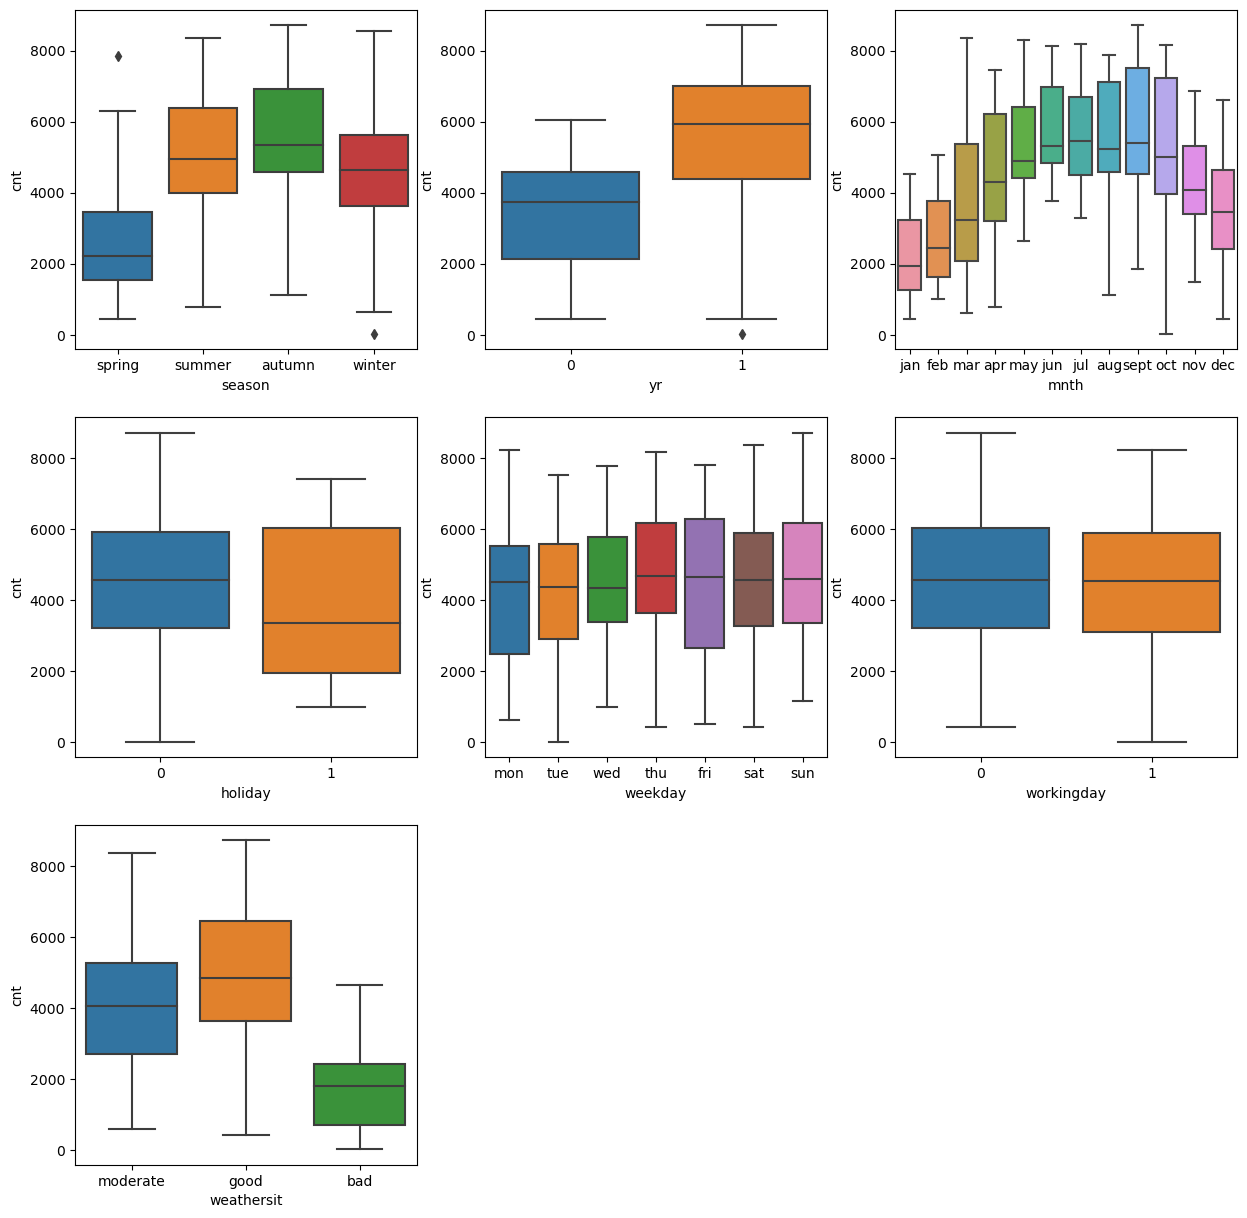

In [15]:
# Boxplot for categorical variables to see demands
cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike, x=i[1], y='cnt')
plt.show()

#### Inference:
Here many insights can be drawn from the plots

1. Season 3,autumn has highest demand for rental bikes
2. Demand for next year has grown
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing
4. When there is a holiday, demand has decreased.
5. Weekday and working day is not giving clear picture abount demand.
6. The good weathershit has highest demand
7. During September, bike sharing is high,During the year end and beginning.

In [16]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### Draw Heatmap of correlation between variables

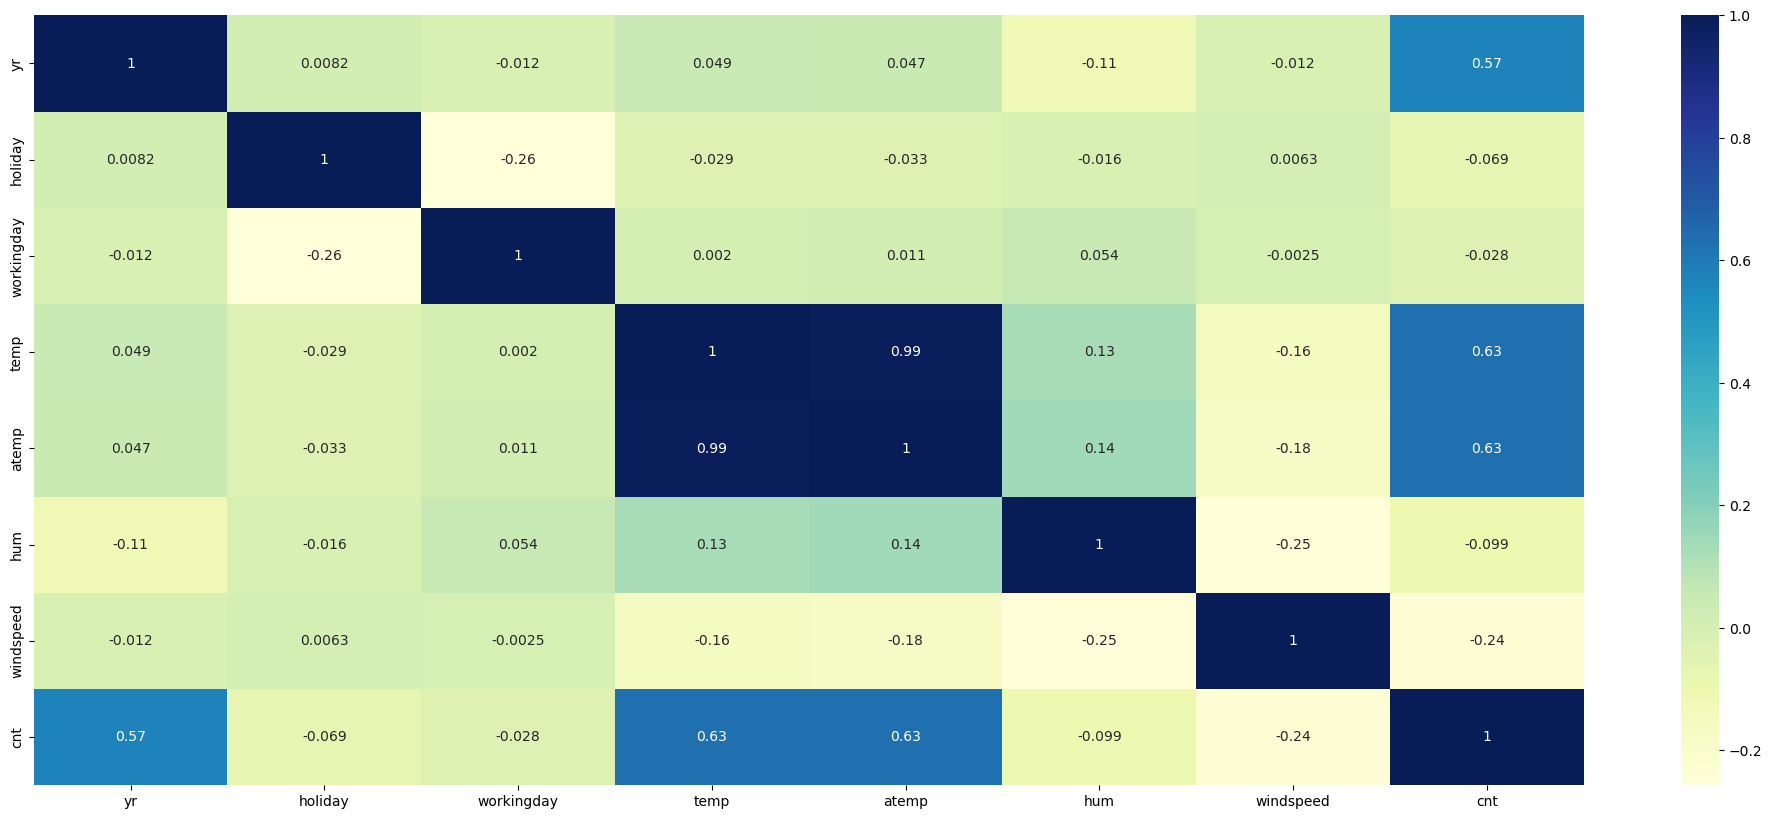

In [17]:
#Calculate Correlation

plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(bike.corr(numeric_only=True),annot=True, cmap='YlGnBu' )
plt.show()

#### selecting important variables and doing EDA on them

<Figure size 1500x3000 with 0 Axes>

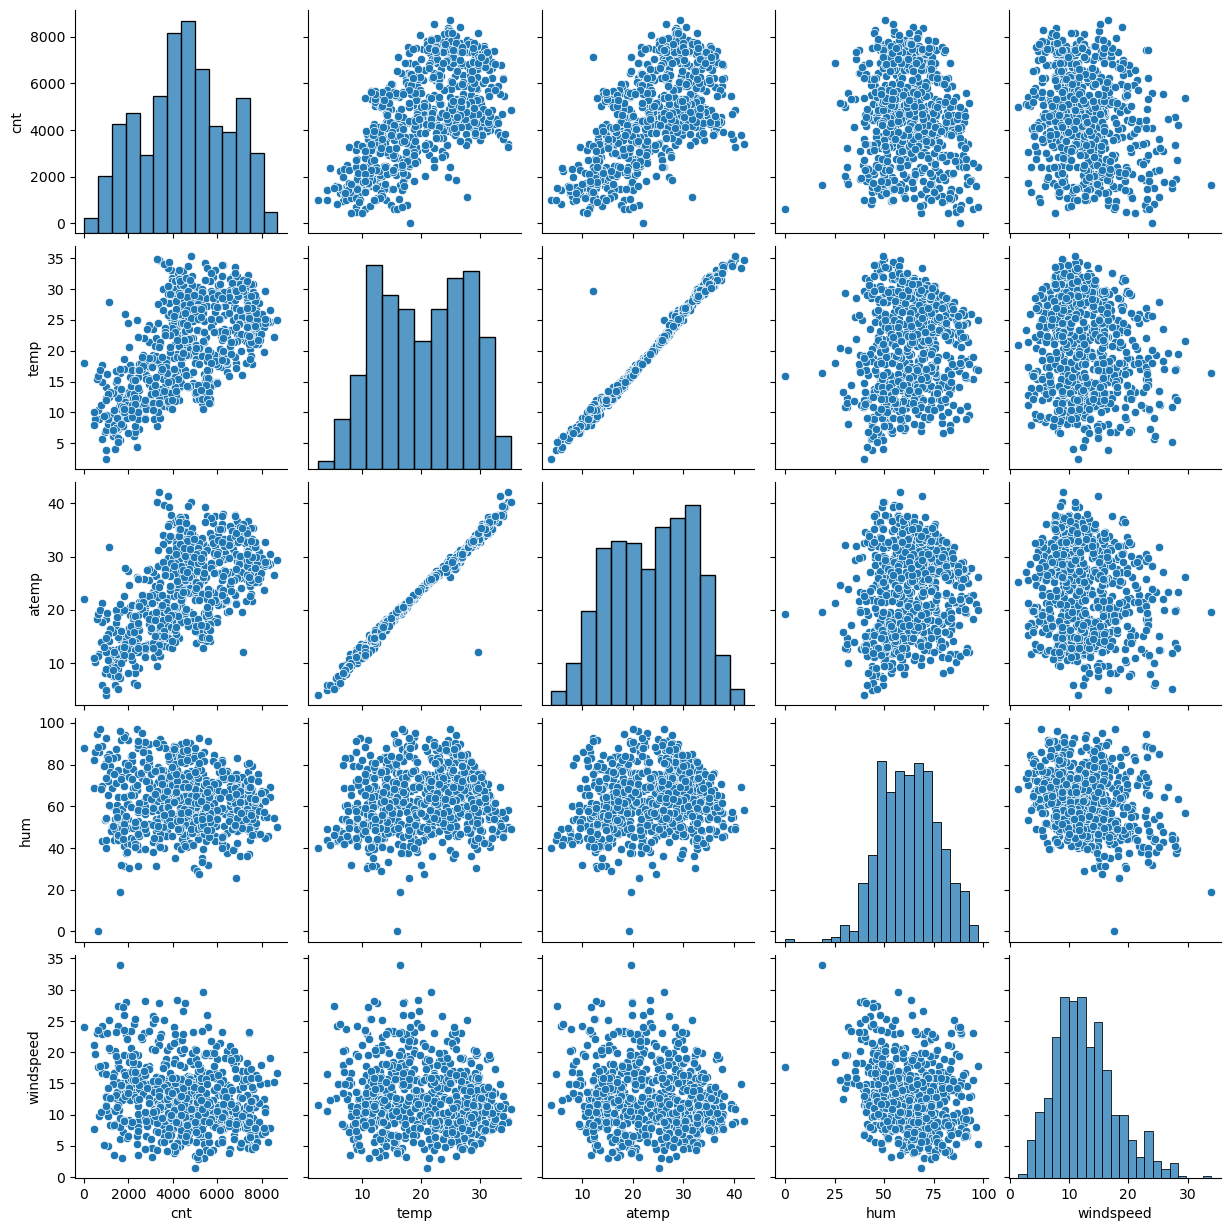

In [18]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

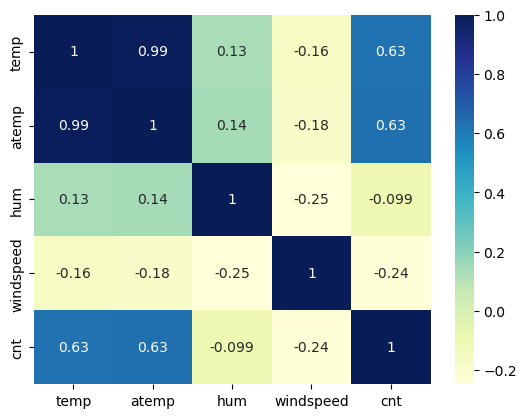

In [19]:
# Checking continuous variables relationship with each other
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='YlGnBu', annot = True)
plt.show()

### Step 4 - Data preparation

#### Create dummy variables for all categorical variables

In [58]:
bike = pd.get_dummies(data=bike,columns=["season","mnth","weekday"],drop_first=True)
bike = pd.get_dummies(data=bike,columns=["weathersit"])

- Dropping the first columns as (p-1) dummies can explain p categories.
- In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [59]:
#Print columns after creating dummies
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [60]:
#Checking head of dataset
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,True,False,False,False,False,False,False,False,True
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,False,True,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,False,False,False,False,True,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,True,False,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,False,True,False


### SPLITTING THE DATA
- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio) 
- We will use train_test_split method from sklearn package for this

In [61]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.70, test_size = 0.30, random_state = 200)


- Verify the info and shape of the dataframes after split:

In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 728 to 695
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   510 non-null    int64  
 1   holiday              510 non-null    int64  
 2   workingday           510 non-null    int64  
 3   temp                 510 non-null    float64
 4   atemp                510 non-null    float64
 5   hum                  510 non-null    float64
 6   windspeed            510 non-null    float64
 7   cnt                  510 non-null    int64  
 8   season_spring        510 non-null    bool   
 9   season_summer        510 non-null    bool   
 10  season_winter        510 non-null    bool   
 11  mnth_aug             510 non-null    bool   
 12  mnth_dec             510 non-null    bool   
 13  mnth_feb             510 non-null    bool   
 14  mnth_jan             510 non-null    bool   
 15  mnth_jul             510 non-null    bool  

In [63]:
df_train.shape

(510, 31)

In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 261 to 470
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   219 non-null    int64  
 1   holiday              219 non-null    int64  
 2   workingday           219 non-null    int64  
 3   temp                 219 non-null    float64
 4   atemp                219 non-null    float64
 5   hum                  219 non-null    float64
 6   windspeed            219 non-null    float64
 7   cnt                  219 non-null    int64  
 8   season_spring        219 non-null    bool   
 9   season_summer        219 non-null    bool   
 10  season_winter        219 non-null    bool   
 11  mnth_aug             219 non-null    bool   
 12  mnth_dec             219 non-null    bool   
 13  mnth_feb             219 non-null    bool   
 14  mnth_jan             219 non-null    bool   
 15  mnth_jul             219 non-null    bool  

In [65]:
df_test.shape

(219, 31)

## Correlation Matrix

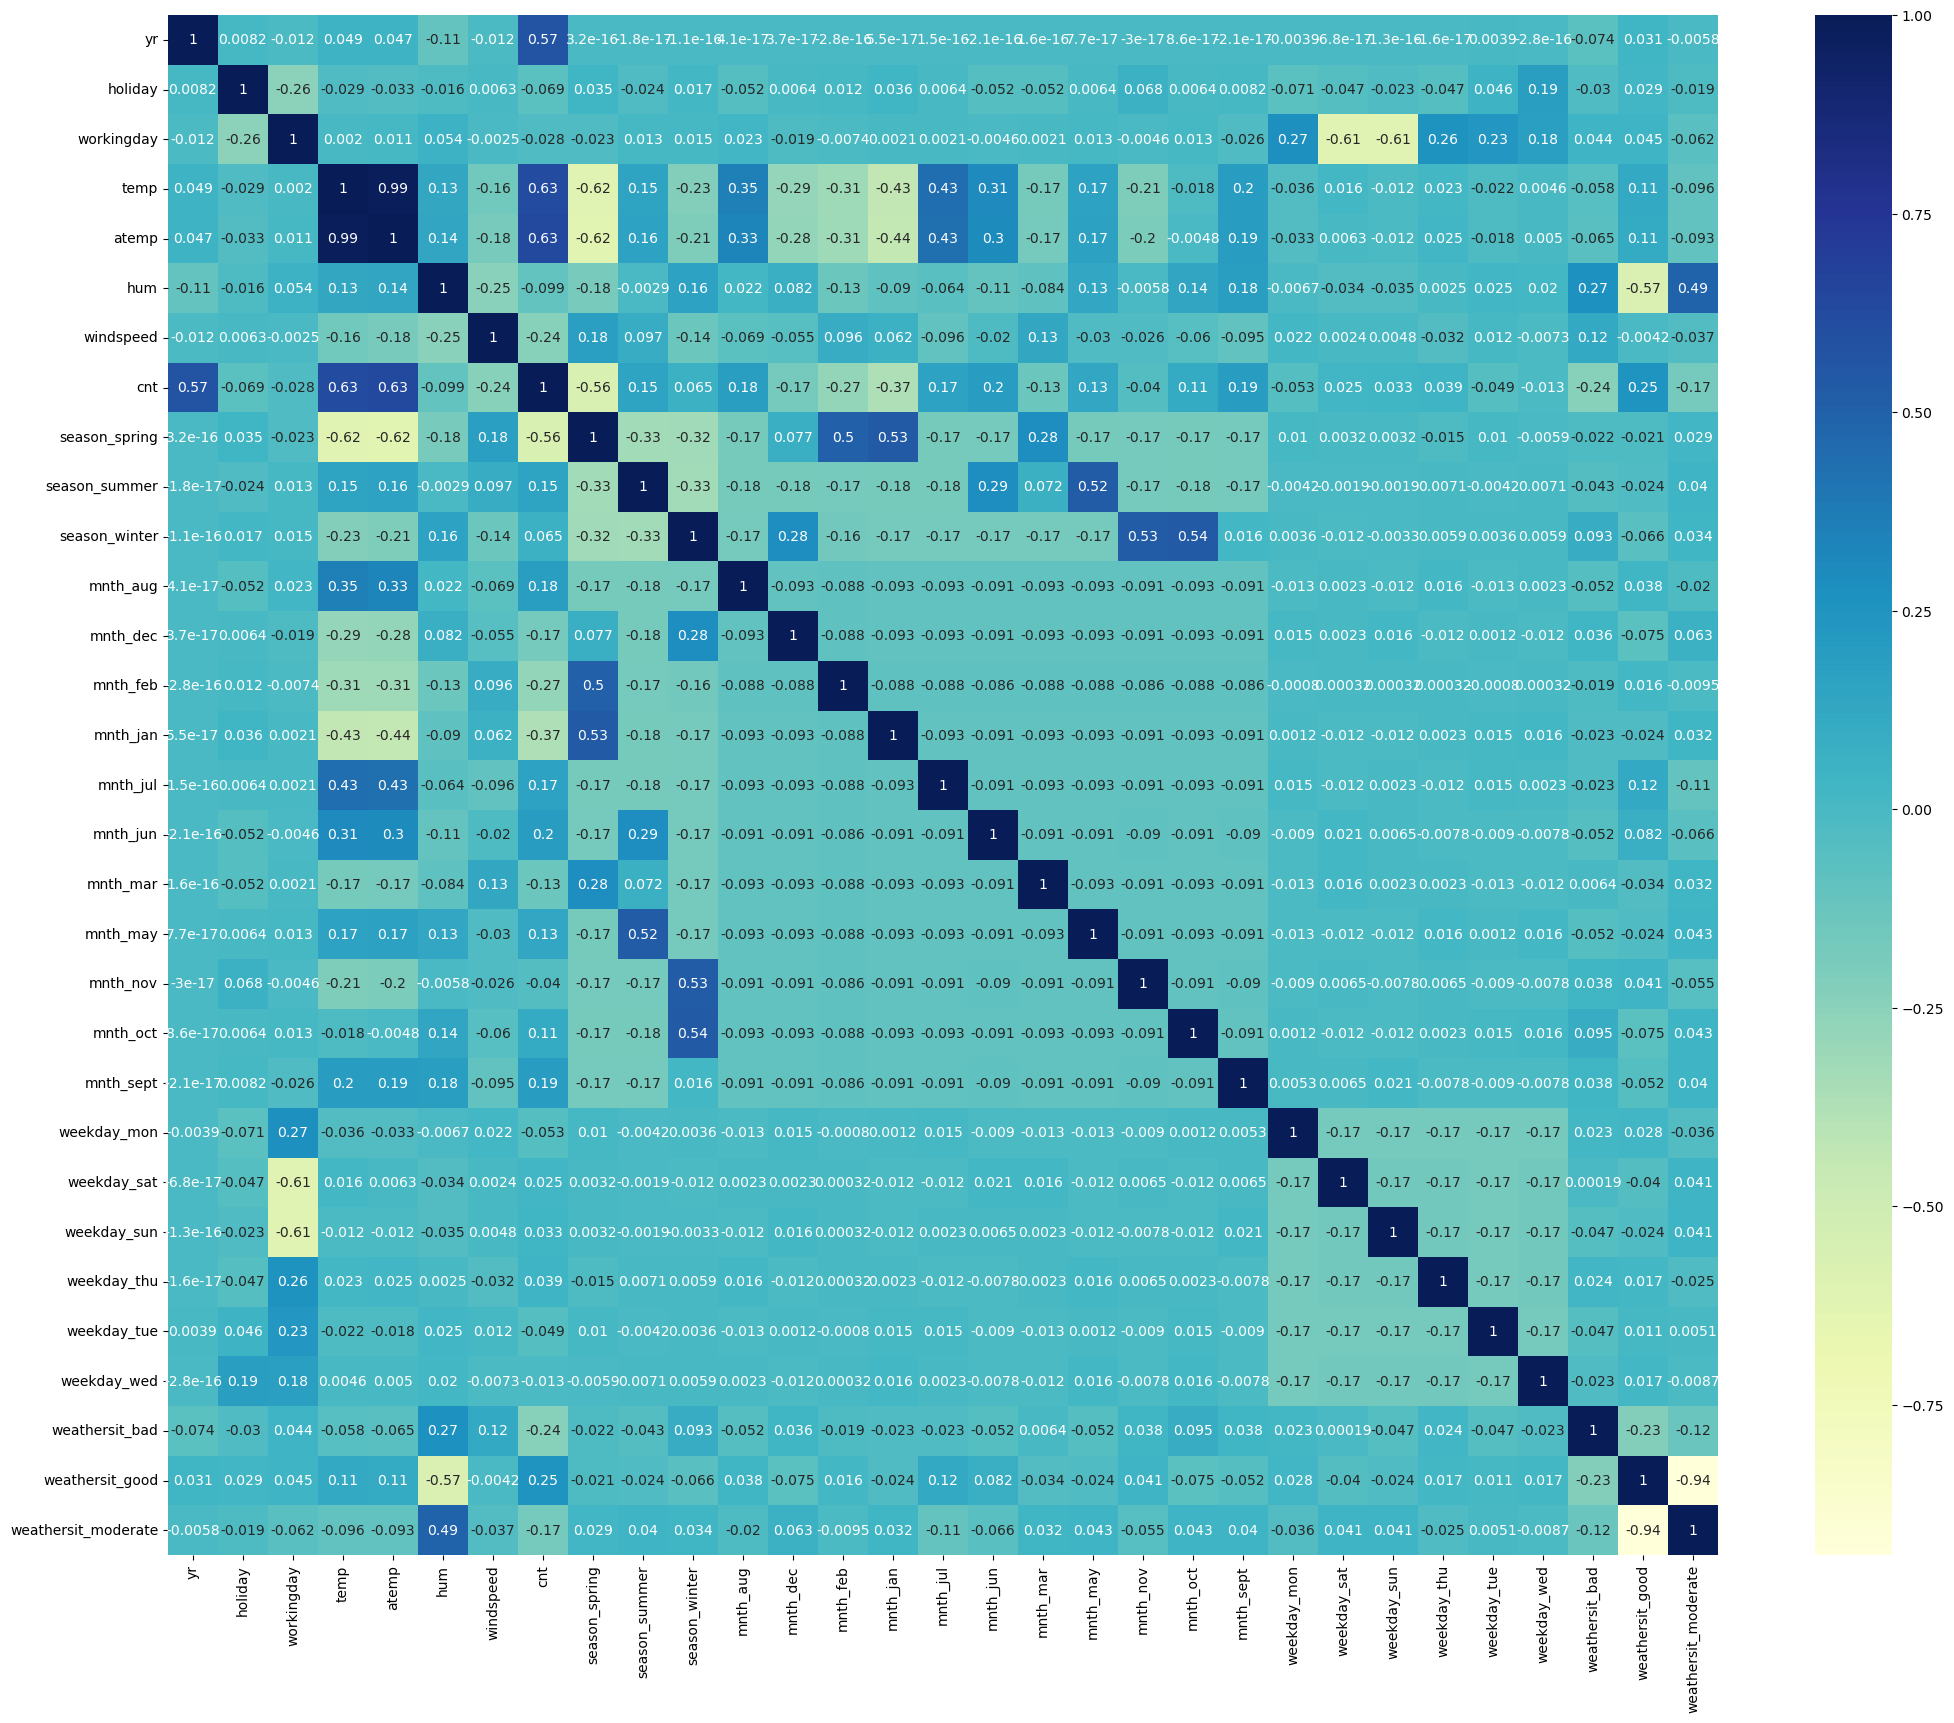

In [66]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Insights:
 - The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
 - We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

### RESCALING THE FEATURES

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()

In [69]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
728,1,0,1,10.489153,11.58500,48.3333,23.500518,1796,True,False,...,False,True,False,False,False,False,False,False,True,False
56,0,0,1,11.582500,14.10960,53.7917,12.500257,1969,True,False,...,False,True,False,False,False,False,False,False,True,False
13,0,0,0,6.595670,9.42065,53.7826,8.478716,1421,True,False,...,False,False,False,True,False,False,False,False,True,False
120,0,0,1,18.518347,22.41020,76.2083,7.125718,3351,False,True,...,False,False,False,False,False,True,False,False,False,True
252,0,0,1,27.060000,30.39810,75.3750,10.291736,5345,False,False,...,True,True,False,False,False,False,False,False,True,False


In [70]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [71]:
# Apply scaler() to all the continous variables

var = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [72]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
728,1,0,1,0.252441,0.204242,0.498067,0.676936,0.164795,True,False,...,False,True,False,False,False,False,False,False,True,False
56,0,0,1,0.286664,0.271808,0.554315,0.338464,0.185682,True,False,...,False,True,False,False,False,False,False,False,True,False
13,0,0,0,0.130569,0.146318,0.554222,0.214724,0.119522,True,False,...,False,False,False,True,False,False,False,False,True,False
120,0,0,1,0.503767,0.493957,0.785315,0.173093,0.352529,False,True,...,False,False,False,False,False,True,False,False,False,True
252,0,0,1,0.771134,0.707736,0.776728,0.270509,0.593263,False,False,...,True,True,False,False,False,False,False,False,True,False


In [73]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.488235,0.033333,0.698039,0.555129,0.525337,0.649374,0.350547,0.489265
std,0.500352,0.179682,0.459559,0.232861,0.215911,0.146392,0.162339,0.233589
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.353506,0.342176,0.542353,0.234958,0.325456
50%,0.000000,0.000000,1.000000,0.560983,0.540443,0.647488,0.330767,0.494265
75%,1.000000,0.000000,1.000000,0.763381,0.707735,0.756118,0.438134,0.655952
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 6:- BUILDING A LINEAR MODEL

### Dividing into X and Y sets for the model building

In [111]:
y = df_train.pop('cnt')
X = df_train


KeyError: 'cnt'

In [75]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
728,1,0,1,0.252441,0.204242,0.498067,0.676936,True,False,False,...,False,True,False,False,False,False,False,False,True,False
56,0,0,1,0.286664,0.271808,0.554315,0.338464,True,False,False,...,False,True,False,False,False,False,False,False,True,False
13,0,0,0,0.130569,0.146318,0.554222,0.214724,True,False,False,...,False,False,False,True,False,False,False,False,True,False
120,0,0,1,0.503767,0.493957,0.785315,0.173093,False,True,False,...,False,False,False,False,False,True,False,False,False,True
252,0,0,1,0.771134,0.707736,0.776728,0.270509,False,False,False,...,True,True,False,False,False,False,False,False,True,False


In [76]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

### RFE
Recursive feature elimination: We will be using the **LinearRegression function from SciKit Learn**  for its compatibility with RFE (which is a utility from sklearn)

In [112]:
# Running RFE with the output number of the 15 variable 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [78]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', False, 13),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 15),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 5),
 ('mnth_jun', False, 16),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 6),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 9),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 12),
 ('weekday_sat', False, 7),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 3),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 11),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 4)]

In [79]:
colms = X_train.columns[rfe.support_]
colms

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_nov', 'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [80]:
X_train.columns[~rfe.support_]

Index(['workingday', 'temp', 'mnth_aug', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [81]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[colms]

In [82]:
X_train_rfe.columns

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_nov', 'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

# Building Linear Model using 'STATS MODEL'

#### Creating a function to build model using statsmodel api

In [83]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(colms):
    X_train_sm = X_train_rfe[colms]
    X_train_sm = sm.add_constant(X_train_sm)
    lm = sm.OLS(y_train, X_train_sm.astype(float)).fit()
    print(lm.summary())
    return lm

#### Creating a function to calculate VIFs and printing values

In [84]:
#Function to calculate VIFs and print Takes the columns for which VIF to be calcualted as a parameter
def cal_vif(colms):
    df1 = X_train[colms].astype(float)
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### Model 1 - By using variables selected by RFE

In [85]:
colms = ['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_nov', 'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(colms)
cal_vif(colms)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     192.1
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          5.19e-195
Time:                        22:18:53   Log-Likelihood:                 508.56
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     494   BIC:                            -917.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2572      0.041     

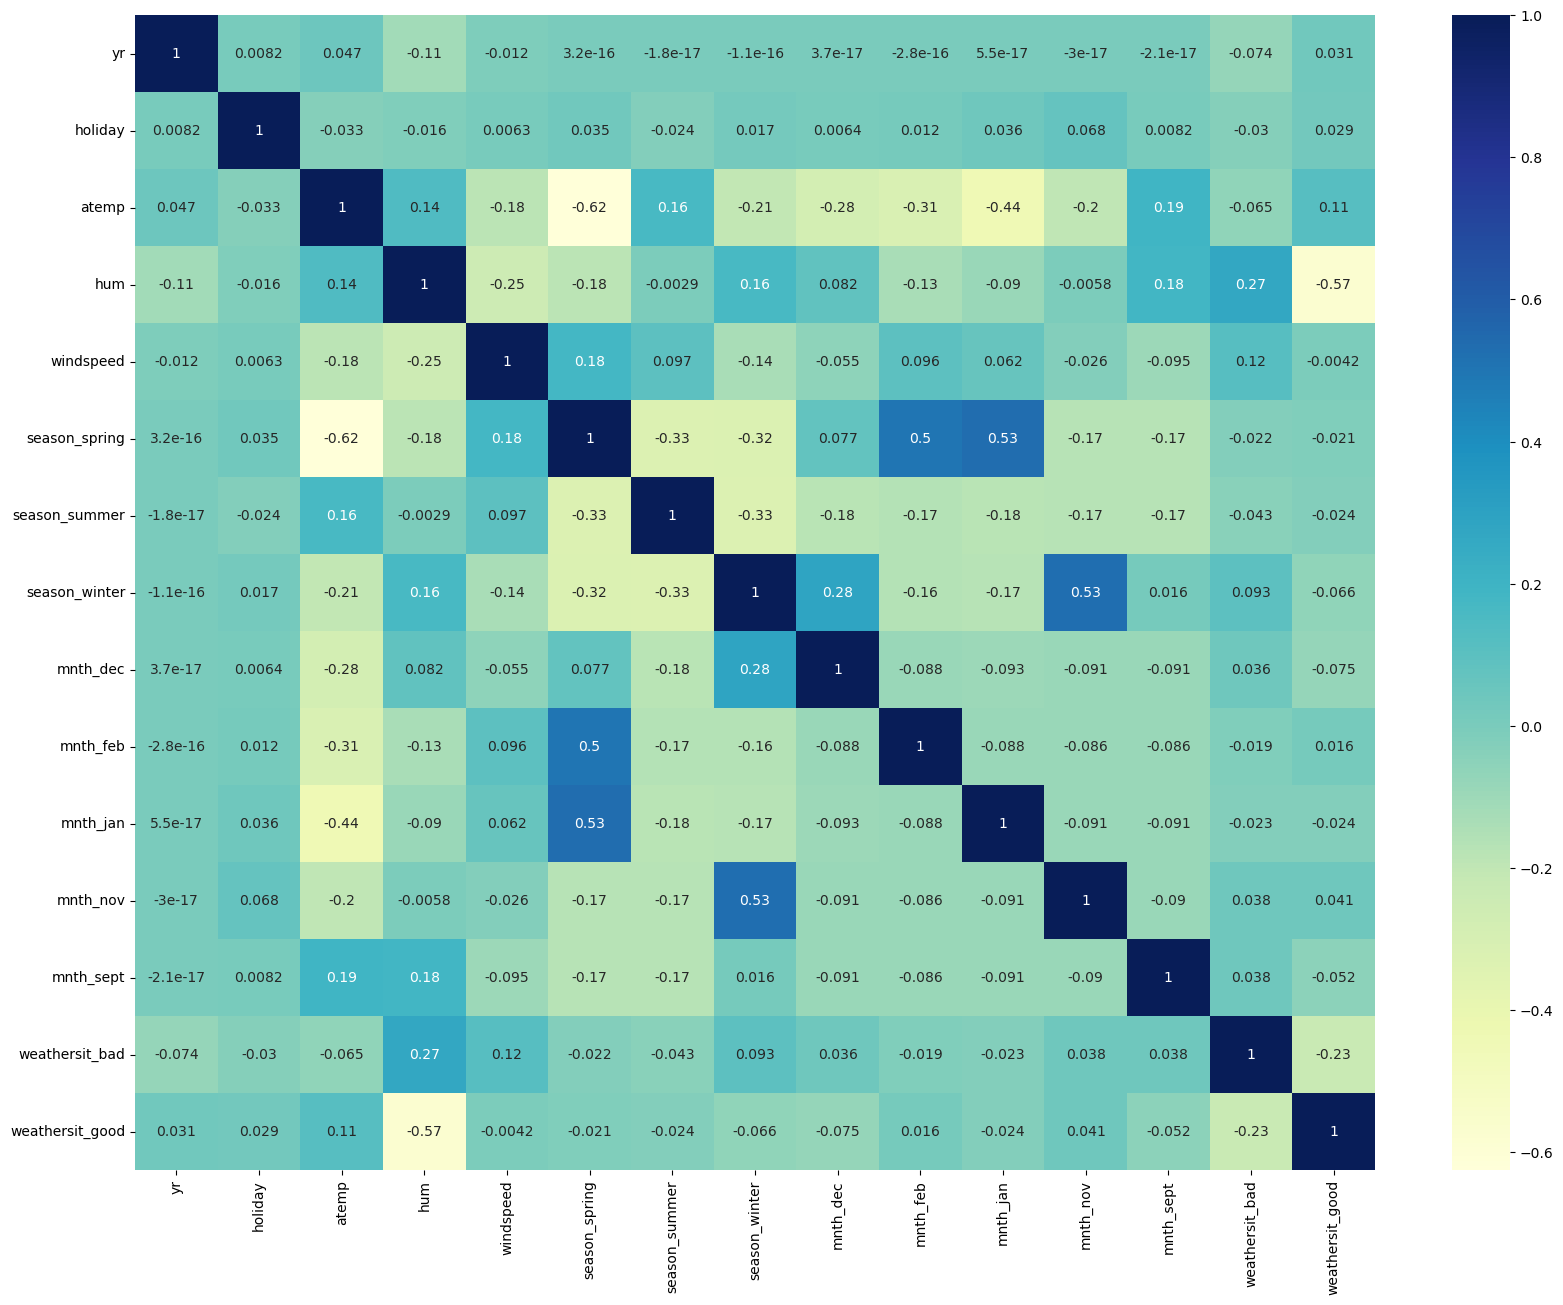

In [67]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (20,15))
sns.heatmap(bike[colms].corr(), cmap='YlGnBu', annot=True)
plt.show()

### Model 2 :-Dropping the variable mnth_jan

In [86]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
colms = ['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_feb', 
       'mnth_nov', 'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(colms)
cal_vif(colms)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     202.8
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.21e-194
Time:                        22:18:56   Log-Likelihood:                 504.91
No. Observations:                 510   AIC:                            -979.8
Df Residuals:                     495   BIC:                            -916.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2360      0.041     

### Model 3

#### Dropping the variable hum

In [87]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
colms = ['yr', 'holiday', 'atemp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_feb', 
       'mnth_nov', 'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(colms)
cal_vif(colms)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.4
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.07e-188
Time:                        22:19:00   Log-Likelihood:                 487.97
No. Observations:                 510   AIC:                            -947.9
Df Residuals:                     496   BIC:                            -888.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0809      0.032     

### Model 4 :- Dropping the variable holiday

In [88]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
colms = ['yr', 'atemp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_feb', 
       'mnth_nov', 'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(colms)
cal_vif(colms)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.8
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.98e-187
Time:                        22:19:04   Log-Likelihood:                 482.17
No. Observations:                 510   AIC:                            -938.3
Df Residuals:                     497   BIC:                            -883.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0785      0.032     

### Model5 :- Dropping variable mnth_feb

In [89]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
colms = ['yr', 'atemp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 
       'mnth_nov', 'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(colms)
cal_vif(colms)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.40e-188
Time:                        22:19:07   Log-Likelihood:                 482.06
No. Observations:                 510   AIC:                            -940.1
Df Residuals:                     498   BIC:                            -889.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0787      0.032     

### Model 6:- Dropping windspeed


In [90]:

# Dropping windspeed

colms = ['yr', 'atemp', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 
       'mnth_nov', 'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(colms)
cal_vif(colms)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.1
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          4.14e-186
Time:                        22:19:17   Log-Likelihood:                 473.36
No. Observations:                 510   AIC:                            -924.7
Df Residuals:                     499   BIC:                            -878.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0326      0.031     

### Model 7 :- Dropping season_summer

In [91]:
# Dropping season_summer and workingday
colms = ['yr', 'atemp', 'season_spring', 'season_winter', 'mnth_dec', 
       'mnth_nov', 'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(colms)
cal_vif(colms)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     270.2
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.06e-185
Time:                        22:19:29   Log-Likelihood:                 469.50
No. Observations:                 510   AIC:                            -919.0
Df Residuals:                     500   BIC:                            -876.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0875      0.023     

#### Inference
- Here VIF seems to be almost accepted. p-value for all the features is almost 0.0.
- R2 is 0.829 Let us select Model 7 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic).
- No insignificant variables and no multi coliinear (high VIF) variables. 
- Difference between R-squared and Adjusted R-squared values for this model is veryless.

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
# fefining a function which made model by using mentioned features 
def build_skl_model(X,y):
    lr = LinearRegression()
    lr.fit(X,y)
    return lr

In [95]:
#Let us build the finalmodel using sklearn usings columns/variables
colms = ['yr', 'atemp', 'season_spring', 'season_winter', 'mnth_dec', 
       'mnth_nov', 'mnth_sept', 'weathersit_bad', 'weathersit_good']

#Building a model with mentioned columns
lr = build_skl_model(X_train[colms],y_train)
print(lr.intercept_,lr.coef_)

0.08752596215870068 [ 0.24626603  0.47582896 -0.12606943  0.10565658 -0.068866   -0.09429106
  0.05570565 -0.17288614  0.08012714]


### Step 7: Model Analysis 
#### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [96]:
y_train_pred = lr.predict(X_train[colms])

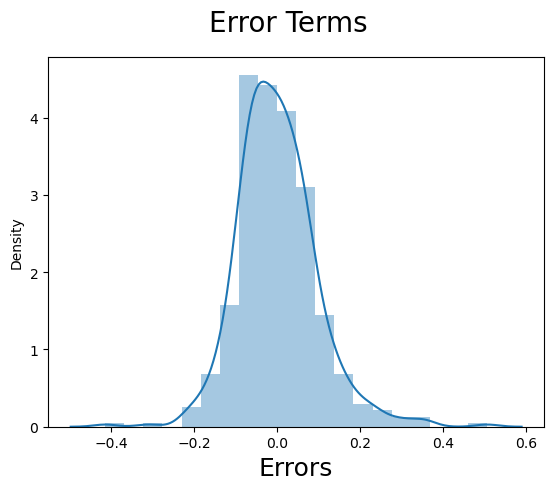

In [97]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_pred - y_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

### Insights
From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

In [98]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8294457567761719

#### Inference
R2 Same as we obtained for our final model

#### Linearity Check

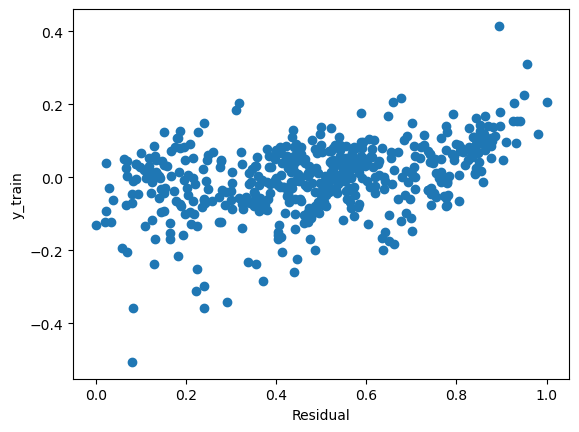

In [99]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

#### Predict values for test data set

In [100]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,True,False,False,False,False,False,False,False,True
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,False,True,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,False,False,False,False,True,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,True,False,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,False,True,False


In [101]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
261,0,0,1,22.515847,26.48375,69.0000,10.166714,4539,False,False,...,True,False,False,False,False,False,True,False,False,True
278,0,0,0,20.260847,24.02125,62.0833,9.041918,4765,False,False,...,False,False,True,False,False,False,False,False,True,False
724,1,0,1,9.976653,11.01665,82.3333,21.208582,441,True,False,...,False,False,False,False,True,False,False,True,False,False
458,1,0,1,22.208347,26.67250,46.9583,12.125325,6436,False,True,...,False,False,False,False,True,False,False,False,True,False
246,0,0,1,29.075847,33.27145,74.2083,13.833289,4940,False,False,...,True,False,False,False,False,True,False,False,True,False


In [103]:
# Apply scaler() to all the continous variables

vars=[ 'temp', 'atemp', 'hum','windspeed','cnt']

df_test[vars] = scaler.transform(df_test[vars])

In [104]:
#Columns from our final model

colms = ['yr', 'atemp', 'season_spring', 'season_winter', 'mnth_dec', 
       'mnth_nov', 'mnth_sept', 'weathersit_bad', 'weathersit_good']

#Predict the values for test data
y_test_pred = lr.predict(X_test[colms])

Text(0.5, 0, 'y_test')

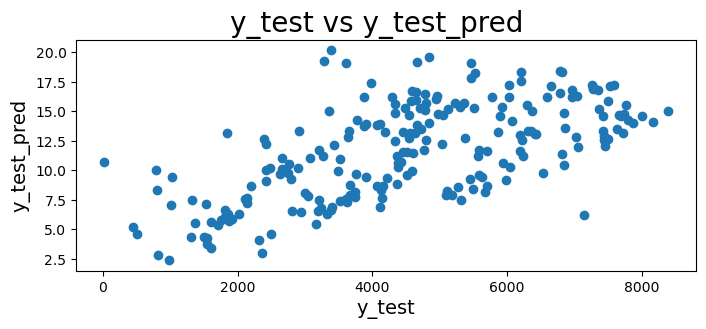

In [105]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure(figsize=[8,3])
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) # Plot heading 
plt.ylabel('y_test_pred', fontsize = 14)
plt.xlabel('y_test', fontsize = 14)                          # X-label


### Step 8: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. seventh model.

Applying the scaling on the test sets

# Final Model Interpretation

## Hypothesis Testing:

Hypothesis testing states that:
- H0:B1=B2=...=Bn=0 
- H1:  at least one  Bi!=0

### F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic:  270.2
- Prob (F-statistic): 1.06e-185

The F-Statistics value of 270.2 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

## The equation of best fitted surface based on model 8:

cnt = 0.08752 + (**yr** × 0.24626603) + (**atemp** × 0.4758289) − (**season_spring**×0.12606943) + (**season_winter**×0.10565658) -(**mnth_dec**×0.068866) -(**mnth_nov**×0.09429106) + (**mnth_sept**×0.05570565) − (**weathersit_bad**×0.17288614) + (**weathersit_good**×0.08012714)

# FINAL REPORT

As per our final Model, the top 3 predictor variables that influences the bike booking are: 
- **Temperature (atemp)** - A coefficient value of ‘0.4758’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.4758 units. 
- **Weather Situation 3 (weathersit_bad)** - A coefficient value of ‘-0.1728’ indicated that, , a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.1728 units.
- **Year (yr)** - A coefficient value of ‘0.2462’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2462 units. 

#### So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking

The next best features that can also be considered are 
- **season_spring:** - A coefficient value of ‘-0.12606943’ indicated that w.r.t , a unit increase in season_4 variable decreases the bike hire numbers by 0.12606943 units. 
- **season_winter** - A coefficient value of ‘0.10565658’ indicated that, winter  variable increases the bike hire numbers by 0.10565658 units. 
